In [1]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

bands = genfromtxt('./helpers/bands.csv', delimiter=',')
dataset = genfromtxt('../datasets/training/11042019/dataset_bbl.csv', delimiter=',')
dataset.shape

(739, 225)

In [2]:
X = dataset[1:,:-1]
y = dataset[1:,-1]
X.shape, y.shape

((738, 224), (738,))

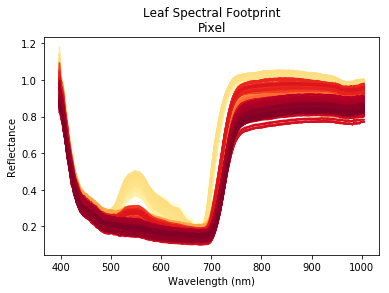

In [3]:
band_range = bands[:]

n = X.shape[0]
colors = pl.cm.YlOrRd(np.linspace(0,1,n))

for i in range(1, X.shape[0]):
    plt.plot(band_range, X[i], color=colors[i])
    
plt.title('Leaf Spectral Footprint\nPixel')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# train size 5/6 or ~83.3%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((738, 224), (738,), (615, 224), (123, 224), (615,), (123,))

In [5]:
from sklearn.svm import SVR
import numpy as np
rng = np.random.RandomState(0)
clf = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.17480229767937683